In [15]:
import os
import sys

print('Python: {}\n'.format(sys.version))
print('Currrent dir:', os.path.abspath(os.path.curdir))

def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    for p in sys.path:
        p = os.path.abspath(p)
    if up:
        newp = os.path.abspath(os.path.join(this_path, '..'))
    else:
        newp = os.path.abspath(this_path)
        
    if this_path not in (p, p + os.sep):
        print('Path added to sys.path: {}'.format(newp))
        sys.path.insert(0, newp)
        
# if notebook inside another folder, eg ./notebooks:
up =  os.path.abspath(os.path.curdir).endswith('notebooks')
add_to_sys_path(os.path.curdir, up)

import numpy as np
import pandas as pd

from pprint import pprint as pp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import HTML, Markdown, Image, IFrame
display(HTML("<style>.container { width:100% !important; }</style>"))

def new_section(title):
    style = "text-align:center;background:#c2d3ef;padding:20px;color:#ffffff;font-size:3em;width:98%"
    return HTML('<div style="{}">{}</div>'.format(style, title))

%load_ext autoreload
%autoreload 2

Python: 3.6.7 (default, Feb 28 2019, 07:28:18) [MSC v.1900 64 bit (AMD64)]

Currrent dir: C:\Users\catch\Documents\GitHub\Geocoders_presentation\notebooks
Path added to sys.path: C:\Users\catch\Documents\GitHub\Geocoders_presentation


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import geopy
import geopandas as gpd
import pycrs
import pyproj

import mpl_toolkits.basemap as mplmap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# project imports
from GeocodersComparison import (comparison as GeoComp4,
                                 inspect_geocoders,
                                 gc4utils,
                                 gc4settings)

# Directories:
dir_geo = GeoComp4.DIR_GEO
dir_html = GeoComp4.DIR_HTML
dir_img = GeoComp4.DIR_IMG
dir_rpt = GeoComp4.DIR_RPT

dir_raw = os.path.join(dir_geo, 'rawjson')

# keys from .env
GOOGLE_KEY = GeoComp4.GOOGLE_KEY
AZURE_KEY = GeoComp4.AZURE_KEY
W3W_dict = GeoComp4.W3W_dict

In [17]:
geocs_dict = inspect_geocoders.get_dict_geocs_class()
n_geocs = len(geocs_dict)

geocs_reqs_dict = inspect_geocoders.get_dict_geocs_required_params(geocs_dict)
n_geocs_with_reqs = len(geocs_reqs_dict)

# Print basic info + test on new reqs:
#print(inspect_geocoders.inspect_geopy_geocs(geocs_dict, geocs_reqs_dict))

# def get_geocs_reqs_df(geocs_dict, geocs_reqs_dict, load_from_dict=True)
# the function checks for json file (geocs_class_reqs.json) holding a previous
# check & loads it if found;
# Pass load_from_dict=False to get a fresh test.

df_inspect, geocs_class_reqs = inspect_geocoders.get_geocs_reqs_df(geocs_dict, geocs_reqs_dict)

inspect_rpt = inspect_geocoders.save_inspect_report(df_inspect, n_geocs, n_geocs_with_reqs)
#print(inspect_rpt)

C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\report\geocs_class_reqs.json
C:\Users\catch\Documents\GitHub\Geocoders_presentation\GeocodersComparison\report\geocs_inspect.html


In [4]:
# set defaults for all geocoders
geopy.geocoders.options.default_user_agent = 'this_app/1'
geopy.geocoders.options.default_timeout = 5

Man = "Manhattan, New York, NY USA"

goo = geopy.geocoders.GoogleV3(api_key=GOOGLE_KEY)
az = geopy.geocoders.AzureMaps(subscription_key=AZURE_KEY)
w3w = geopy.geocoders.What3Words(api_key=W3W_dict['W3W_API'])
arc = geopy.geocoders.ArcGIS()

# get raw results

ans = az.geocode(Man)
az_man_raw = ans.raw

ans = goo.geocode(Man)       
goo_man_raw = ans.raw

ans = arc.geocode(Man)
arc_man_raw = ans.raw

In [5]:
# Query list:
# Each query list string is passed to the geocoding function.
query_lst = GeoComp4.query_lst
print("\nList of query strings that will be passed to each geocoder:")
for i, q in enumerate(query_lst):
    print('{}. {!r}'.format(i, q))

# Geoloders in the comparison:
colors_dict = GeoComp4.colors_dict

geocs = GeoComp4.geocs
#print("\nGeocoders compared:\n", geocs)

# the relative path is needed for IFrame
fname_boston_rel = os.path.relpath(os.path.join(dir_html, 'Boston.html'))
fname_nyc_rel = os.path.relpath(os.path.join(dir_html, 'New_York_City.html'))
fname_kings_rel = os.path.relpath(os.path.join(dir_html, 'Kings_county.html'))

globe_pm_eq = os.path.join(dir_img, 'globe_pm_eq.png')
projs_mercator = os.path.join(dir_img, 'projs_mercator.png')
projs_cylindrical = os.path.join(dir_img, 'projs_cylindrical.png')
projs_others = os.path.join(dir_img, 'projs_others.png')

rpt_geocs_inspect = os.path.join(dir_rpt, "geocs_inspect.html")


List of query strings that will be passed to each geocoder:
0. 'New York City, NY, USA'
1. "Cleopatra's needle, Central Park, New York, NY, USA"
2. 'Bronx county, NY, USA'
3. 'Kings county, NY, USA'
4. 'New York county, NY, USA'
5. 'Queens county, NY, USA'
6. 'Richmond county, NY, USA'
7. 'Boston, MA, USA'


![Earthrise](earthrise_banner.png) 

<h1><span> 1 Earth : N Geocoders </span></h1>

## Geocoding Explorations with Python  
---
### Cat Chenal, Ph.D.  
### Postgres Women NYC, Renee Phillips, organizer, May, 23 2019  

# This happened to me:

In [14]:
IFrame(fname_boston_rel, 1350, 600)

In [7]:
IFrame(fname_kings_rel, 1350, 600)

# What's in a map?

In [8]:
inspect_geocoders.show_map_components()

<h1><span> Mapping with Python</span></h1>
---


| Library        | Description |
| :------------- |:------------- |
|GDAL|Fundamental package for processing vector and raster data formats (many modules below depend on this)|
|Shapely|Manipulation and analysis of planar geometric objects|
|**Geopandas**|Pandas + Shapely|
|Fiona|alternative for geopandas (shapefile loader)|
|**Geopy**|Geocoding library|
|Pyproj|Performs cartographic transformations and geodetic computations|
|PyCRS|"For reading, writing, and converting between various common coordinate reference system (CRS) string and data source formats"|
|Pysal|Library of spatial analysis functions written in Python|
|**Folium**|Wrapper for Leaflet: beautiful and highly customizable maps|
|**OSMnx**|OpenStreetMap street networks| 
|**Networkx**|Network analysis and routing|
|Scipy.spatial|Spatial algorithms and data structures|
|Rtree|Spatial indexing for Python for quick spatial lookups|
|**Cartopy**|"Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps."|
|**Matplotlib toolkit Basemap**||
|GeoViews|Interactive Maps for the web|
|Geoplot|High-level geospatial data visualization library for Python|
|Dash|Dash is a Python framework for building analytical web applications|
|More here:| https://automating-gis-processes.github.io/2017/lessons/L1/Intro-Python-GIS.html|

# Full-blown Geographic Information System (GIS) platforms:
---
## ESRI ArcGIS
## QGIS (open source)
---

# GeoPandas 
--- 

<h2 style="text-align:left"><u>Geopy geocoders</u> included!
    <br> `geopandas.tools.geocode` </h2>

<h2 style="text-align:left">Get <u>PostGIS</u> data:
    <br> `geopandas.read_postgis`</h2>

<h4>"Returns a GeoDataFrame corresponding to the result of the query string, which must contain a geometry column in WKB representation."</h4>

<h1><span>What's geocoding?</span></h1>


---  
# *Forward*:  "query string" &rarr; (longitude, latitude)  
# *Reverse*: (longitude, latitude) &rarr; "address/description"  

```
Obtaining the geolocation coordinates of a location specified by query string can be achieved using calls to geocoding APIs:
```

In [9]:
HTML("<h1>Accessing geocoding services:</h1>")
inspect_geocoders.show_geoc_access()

In [10]:
HTML(filename=inspect_rpt)

Geocoder,Class,Requires,Comments
arcgis,'geopy.geocoders.arcgis.ArcGIS',None,
azure,'geopy.geocoders.azure.AzureMaps',['subscription_key'],
baidu,'geopy.geocoders.baidu.Baidu',['api_key'],Queries/results in Chinese
banfrance,'geopy.geocoders.banfrance.BANFrance',None,"Search restricted to the continental, European territory of France; limit=1 does not seem to work."
bing,'geopy.geocoders.bing.Bing',['api_key'],
databc,'geopy.geocoders.databc.DataBC',None,
geocodeearth,'geopy.geocoders.geocodeearth.GeocodeEarth',['api_key'],
geocodefarm,'geopy.geocoders.geocodefarm.GeocodeFarm',None,
geonames,'geopy.geocoders.geonames.GeoNames',['username'],
google,'geopy.geocoders.googlev3.GoogleV3',['api_key'],


### PostGIS geocoder :<br><br>```SELECT g.<this>, g.<that> FROM geocode(<query str>,1) AS g;```
    
### Tiger Geocoder (extra PostGIS feature):<br><br>&rarr;&nbsp;&nbsp;Works with the TIGER (Topologically Integrated Geographic Encoding and Referencing system) and Line and Master Address database export released by the US Census Bureau.

### Census Bureau geocoder:  https://geocoding.geo.census.gov/

```
This company has implemented a solution to a rather common logistic problem: how to deliver good & services (parcels, medical care) where there are no known adresses (as in a shantytown, for example)?

They tiled the land area with squares of 3 x 3 meters and assigned to each square a unique combination of 3 words.
```

<h1><span>What3Words</span></h1>

```W3W is better accessed with the usual `requests` library, if you need the grid (squares)```

### The W3W API has an additional endpoint, the `grid`.
### It is NOT available in `geopy.geocoders`.

```
W3W  map website has different map providers; the default: GoogleMaps

The result of a geocoding query is a 3x3 square named with 3 words

You can get the 3 words for each square in your appartment...
```

---
## Their map website is using Google's API for geocoding.
### This means that they obtain the geocoordinates of a traditional query, then use them to *reverse* code using the w3w api.


### They carry over the quirky results...

<h4 style="text-align:left;">"Manhattan, New York, NY USA" :: "soil.pushes.mole"
    <br>&nbsp;&nbsp;&nbsp;&rarr; 225 CPW, NY, NY 10024, a building on CPW, btw 82nd & 83rd St</h4>
<h4 style="text-align:left;">"New York county, NY, USA" :: "dress.sharp.brave
    <br>&nbsp;&nbsp;&nbsp;&rarr; City Hall</h4>
<h4 style="text-align:left;">"Brooklyn, NY, USA" :: "recent.pints.giving"
    <br>&nbsp;&nbsp;&nbsp;&rarr; Intersection of Atlantic & Brooklyn aves</h4>
<h4 style="text-align:left;">"Kings county, NY, USA" :: "recent.pints.giving"
    <br>&nbsp;&nbsp;&nbsp;&rarr; same</h4>

## "calm.spot.green" 
### ...is a square in Minnesota

## Web site:
### <a href="https://map.what3words.com/uses.noses.cried">W3W example: "uses.noses.cried"</a>

<h1><span> Why so many geocoding APIs?</span></h1>

<h3  style="text-align:left;"><ol>
<li>They restrict their search areas to a specific country,<br> e.g. `BANFrance`</li><br>
<li>They return their results in a specific language,<br> e.g. `Yandex`: Russian, `Baidu`: 'Chinese'</li><br>
<li>They use a different coordinate system:<br> `What3Words`</li><br>
<li>They package their results in a different way</li>
</ol></h3>

In [11]:
HTML("""<h3>This difference in packging can is made obvious when requesting 
the `raw` results of a geocoding query</h3>
<h4 style="text-align:left;">
Raw results for query="{}"</h4>""".format(Man))

HTML('<h5 style="text-align:left;">ArcGis:</h5>')
pp(arc_man_raw)
HTML('<h5 style="text-align:left;">Google:</h5>')
pp(goo_man_raw)

{'address': 'Manhattan, New York',
 'attributes': {},
 'extent': {'xmax': -73.99600999999994,
            'xmin': -74.01600999999995,
            'ymax': 40.72450000000004,
            'ymin': 40.704500000000046},
 'location': {'x': -74.00600999999995, 'y': 40.714500000000044},
 'score': 100}


{'address_components': [{'long_name': 'Manhattan',
                         'short_name': 'Manhattan',
                         'types': ['political',
                                   'sublocality',
                                   'sublocality_level_1']},
                        {'long_name': 'New York',
                         'short_name': 'New York',
                         'types': ['locality', 'political']},
                        {'long_name': 'New York County',
                         'short_name': 'New York County',
                         'types': ['administrative_area_level_2', 'political']},
                        {'long_name': 'New York',
                         'short_name': 'NY',
                         'types': ['administrative_area_level_1', 'political']},
                        {'long_name': 'United States',
                         'short_name': 'US',
                         'types': ['country', 'political']}],
 'formatted_address': 'Manhattan, New York

## A location's bounding box is always part of the raw output: i.e. as 'extents', 'bounds', or 'boundingBox'  

## Are the boxes stored or calculated?

![Output of GeoComp4.df_to_pic(df_T_2, save_tbl_name='comp_Loc_Center_tbl')](../GeocodersComparison/images/comp_Loc_Center_tbl.svg)


## In the case of ArcGis, it seems the boxes are stored; R-Tree boxes?
## For Nominatim and Google, a location coordinates are ~ different from the box center

---
---
# Knowing all this is not enough to find out the quirks in my results: need to get to the GIS of it!

```
This is because maping is a science that tries to solve a transformation problem: 3D &rarr; 2D
```

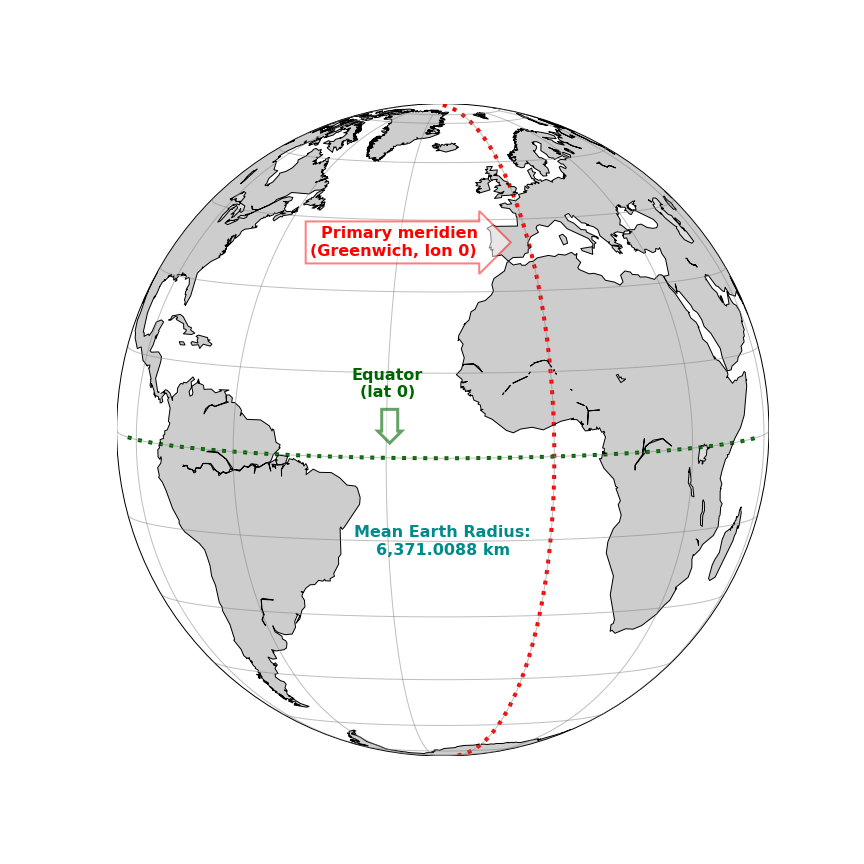

In [93]:
HTML('<h1>3D &rarr; 2D</h1>');
Image(globe_pm_eq)

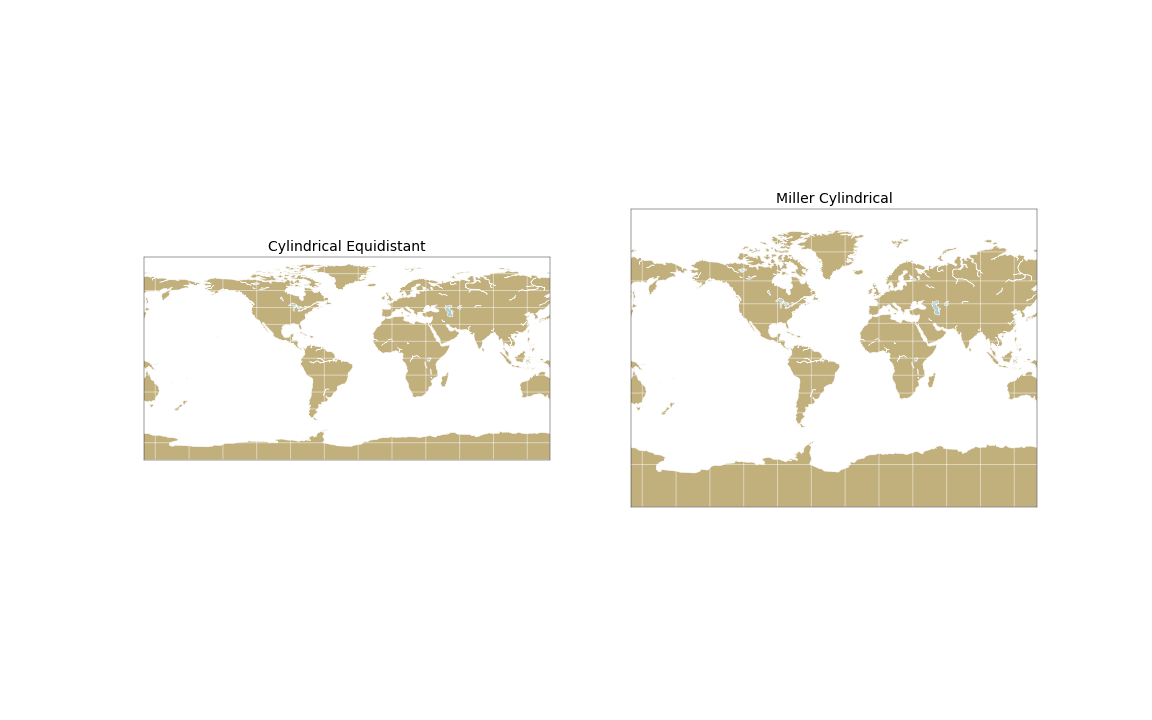

In [136]:
HTML('<H1>Sometimes we want this: </H1>')
Image(projs_cylindrical)

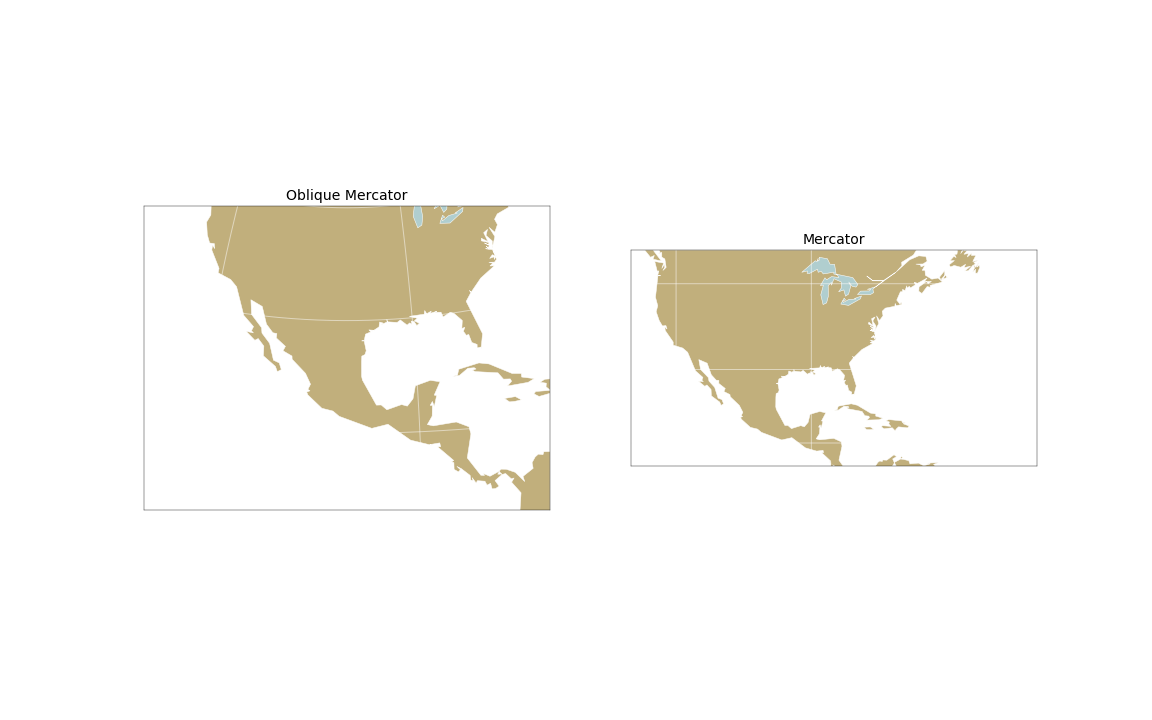

In [138]:
HTML('<H1>Sometimes we want that: </H1>')
Image(projs_mercator)

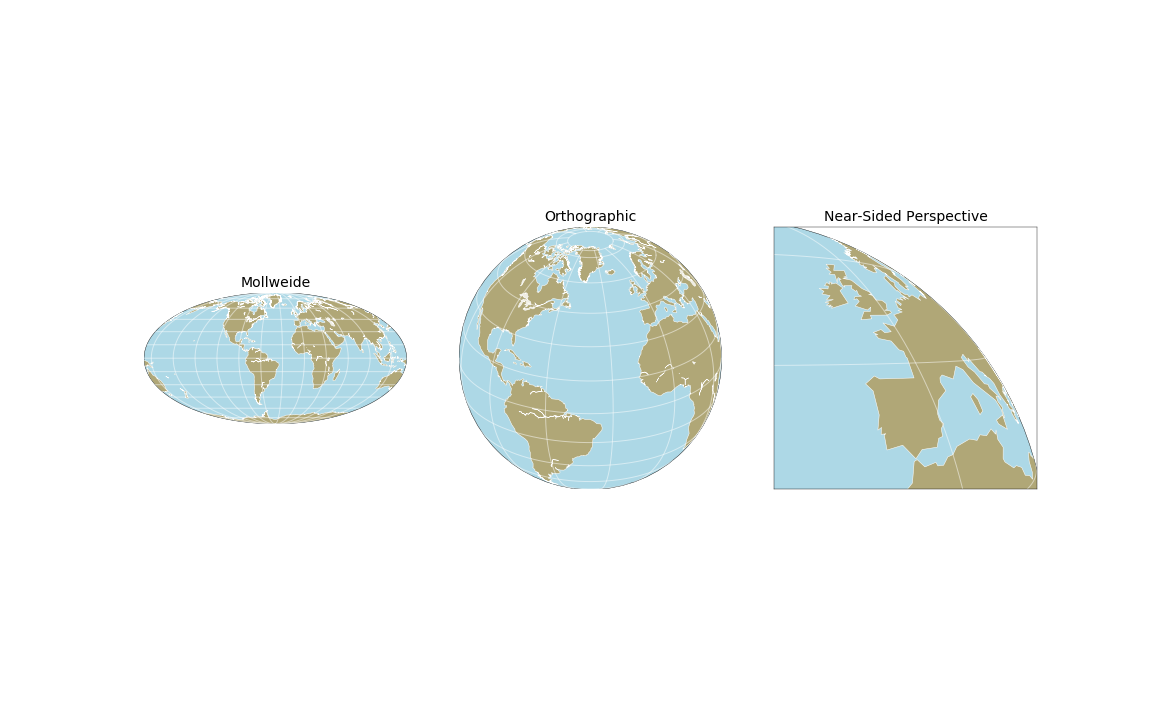

In [94]:
HTML('<H1>Then again, sometimes we want something else: </H1>')
Image(projs_others)

# ... There are 28 other possibilities...

<h1><span>GIS Components</span></h1>

## 

Geodesics + Global Positioning System (GPS) => relativity (SR and GR)
  
The GPS ia an array of satellites orbiting the Earth which emit radio signals along with the signal start time from their atomic clock. This data and the speed of light is used by a ground receiver to obtain its lat, lon and time with a (common) accuracy of ~ 5 meters and local time to 40 billionths of a second[1].

The correction that any GPS receiver applies to the data accounts for two oposite, relativistic effects that do not cancel each other out.

This is because funny thinks happen when clocks are fast moving (~14,000 km/hr) at an altitude where gravity is about 4 times weaker than on Earth (~20 km).

Special Relativity effect (time dilation viz c): T1
	A fast moving clock ticks more slowly (~6 microsec/day)
General Relativity effect (space and time curvature due to gravity): T2
	The orbiting clock ticks slightly faster, by about (~45 microsec/day).

Correction: T2 - T1 = ~38 microsec/day (or about 10km/day)

[1] https://www.gps.gov/systems/gps/performance/accuracy/
[2] http://www.themarginal.com/emc2/applications_of_relativity_in_gps.htm

## Precision from the number of  places past the decimal point

<h1><span>Recap</span></h1>


# Thanks!

# Questions?